

### **Context:**

 - There is a huge demand for used cars in the market and it is continuing to grow over the past few years. Unlike new cars where price and supply can be determined and managed by OEMs, used car market has a large number of uncertainties in both pricing and supply. There are also several factos that affects the final price like mileage, brand, model, etc. With these in mind, the pricing scheme of the used cars becomes important in order to grow in the market.

### **The objective:**

 - The goal of this project is to come up with a pricing model that can effectively predict the price of used cars.

### **The key questions:**

- What features drive the price of used cars?
- How reliable is the model for predicting the price of used cars?
- What strategies can we device that will maximize profits?



### **The problem formulation**:

- We are trying to solve the pricing problem of selling used cars. 

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: **
- There is a wide range of mileage in the dataset. 
- There seems to be a lot of null values in the New_price column.
- The S.No are all unique so we might need to drop this column.

### **Let us check the data types and and missing values of each column** 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**
- There are a lot of null values in the New_Price column. This might be because most of these cars are old and thus it's discontinued by OEMs.
- There are also a substantial amount of Null values under the Price column. This might be because sellers have a hard time pricing used cars.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [7]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns= "S.No.", inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights:**
- The highest kilometers_driven in the data set is at 6.5million kms.
- As expected, the New_price is higher the the price. The average price of the used cars are around 58% cheaper than the new ones.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
data.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [10]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


#### **Observations and Insights:**
- More than half of the used cars run on diesel. 
- Majority of the used cars has manual transmission.
- More than 80% of the sellers are first owners of the used car.

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [11]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by= 'Kilometers_Driven', ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [12]:
data.drop([2328], inplace=True )

**Check Mileage extreme values**

In [13]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by='Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [14]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

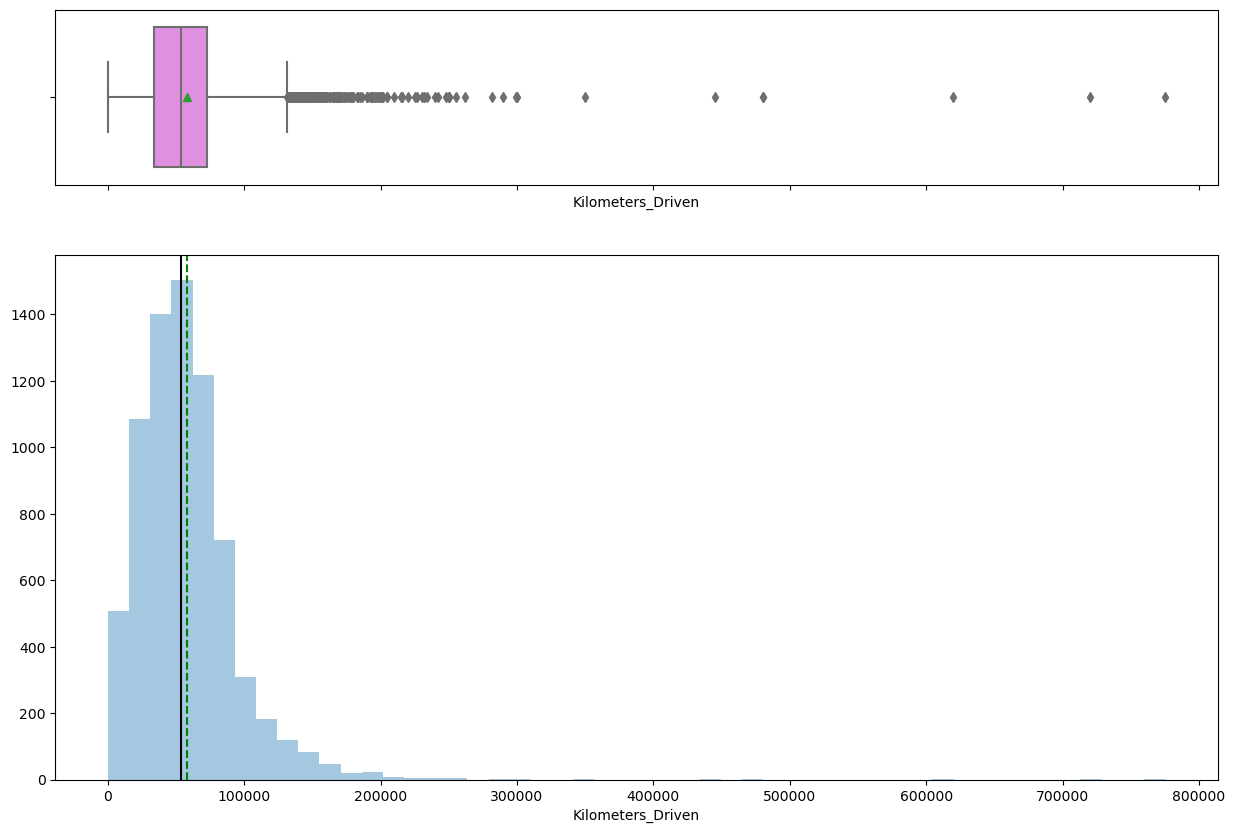

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

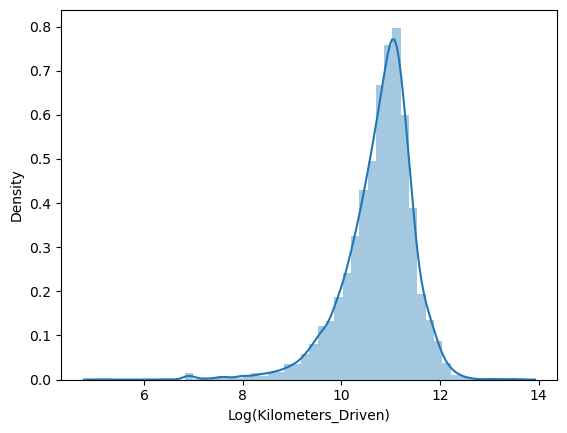

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:**
 - If there's too much skewness in the data,  many statistical models don't work effectively.In skewed data the outliers adversely affect a model's performance, especially regression-based models.
 - The log transformation made the data less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

In [17]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

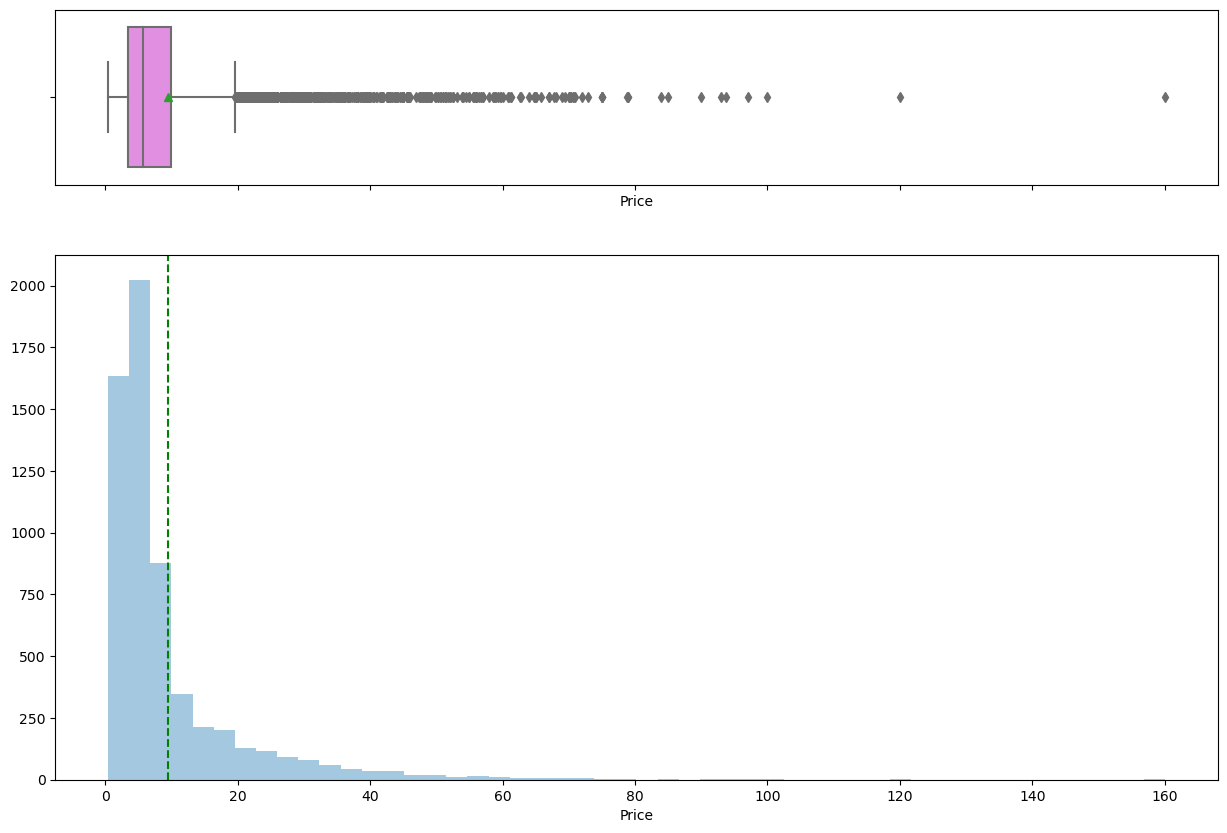

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

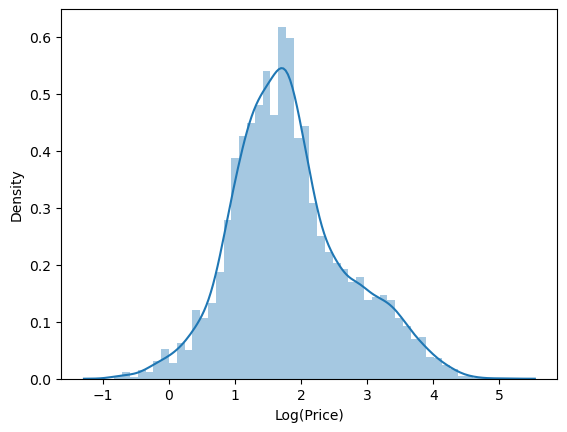

In [19]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

In [20]:
# We can Add a transformed Price feature in data
data["Price_log"] = np.log(data["Price"])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

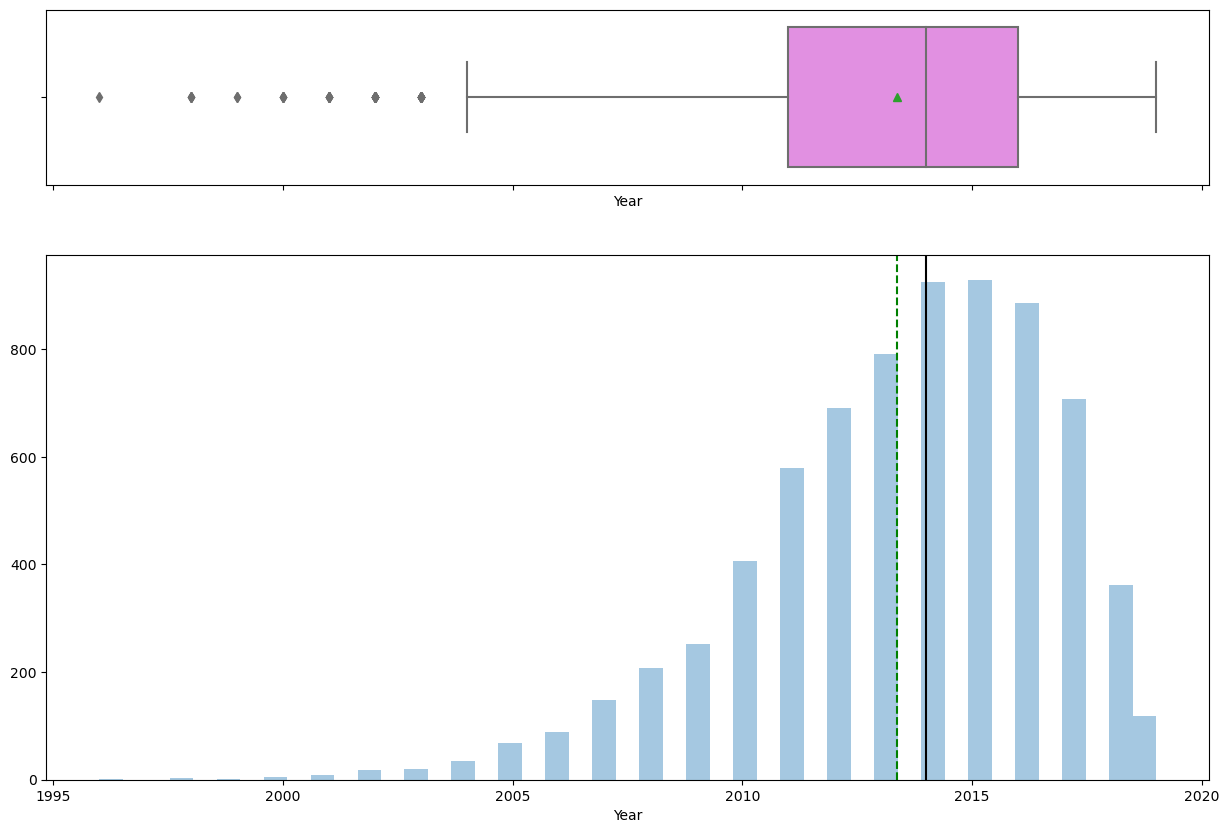

In [21]:
histogram_boxplot(data['Year'])

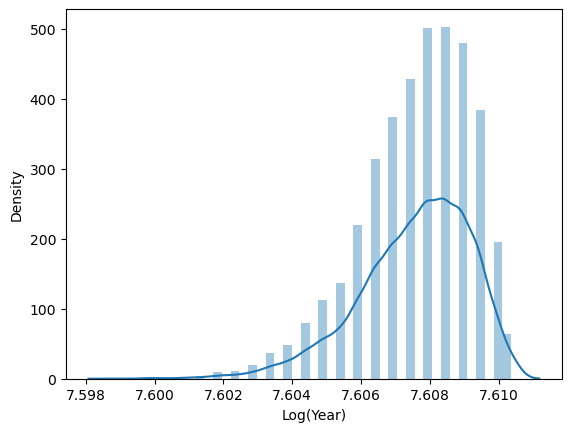

In [22]:
sns.distplot(np.log(data["Year"]), axlabel = "Log(Year)");

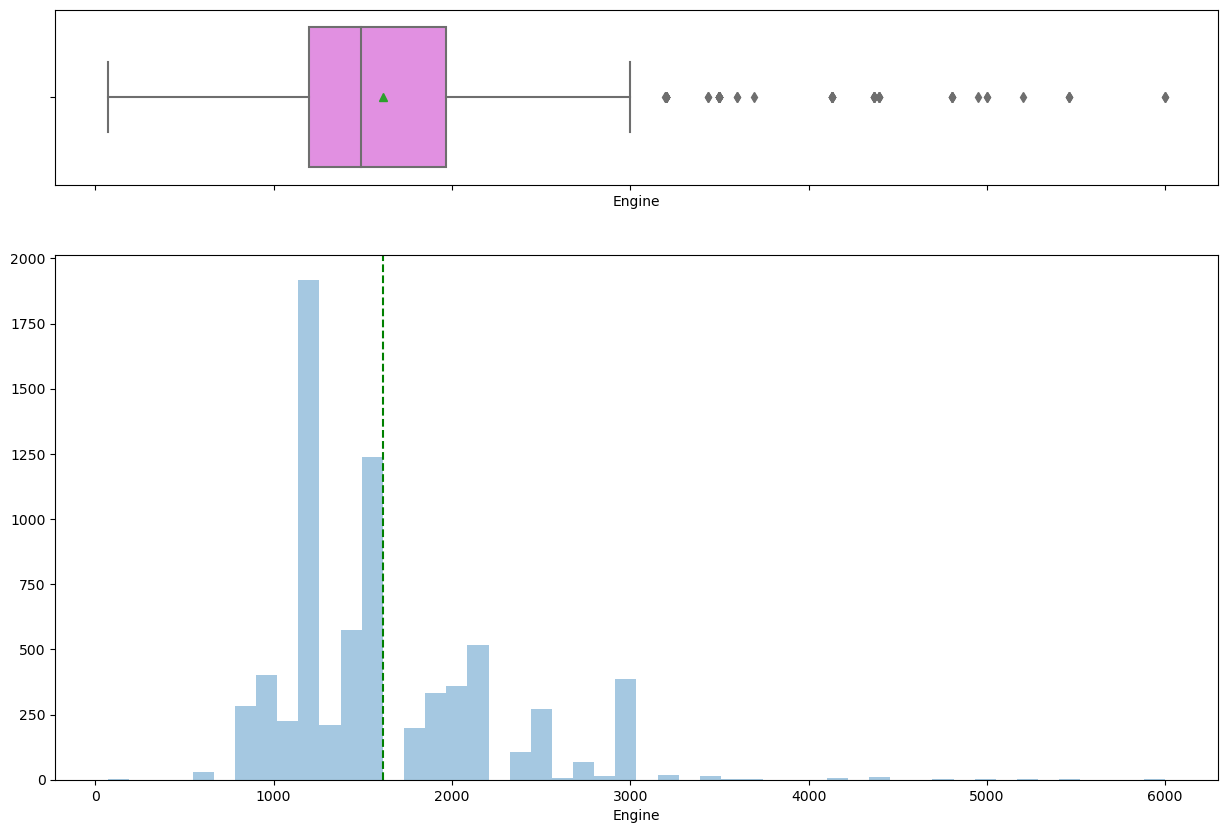

In [23]:
histogram_boxplot(data['Engine'])

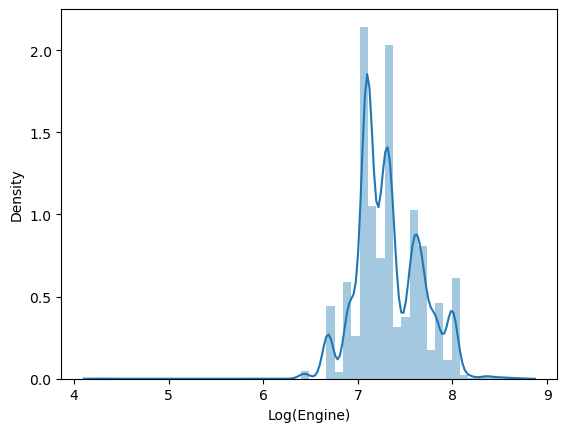

In [24]:
sns.distplot(np.log(data["Engine"]), axlabel = "Log(Engine)");

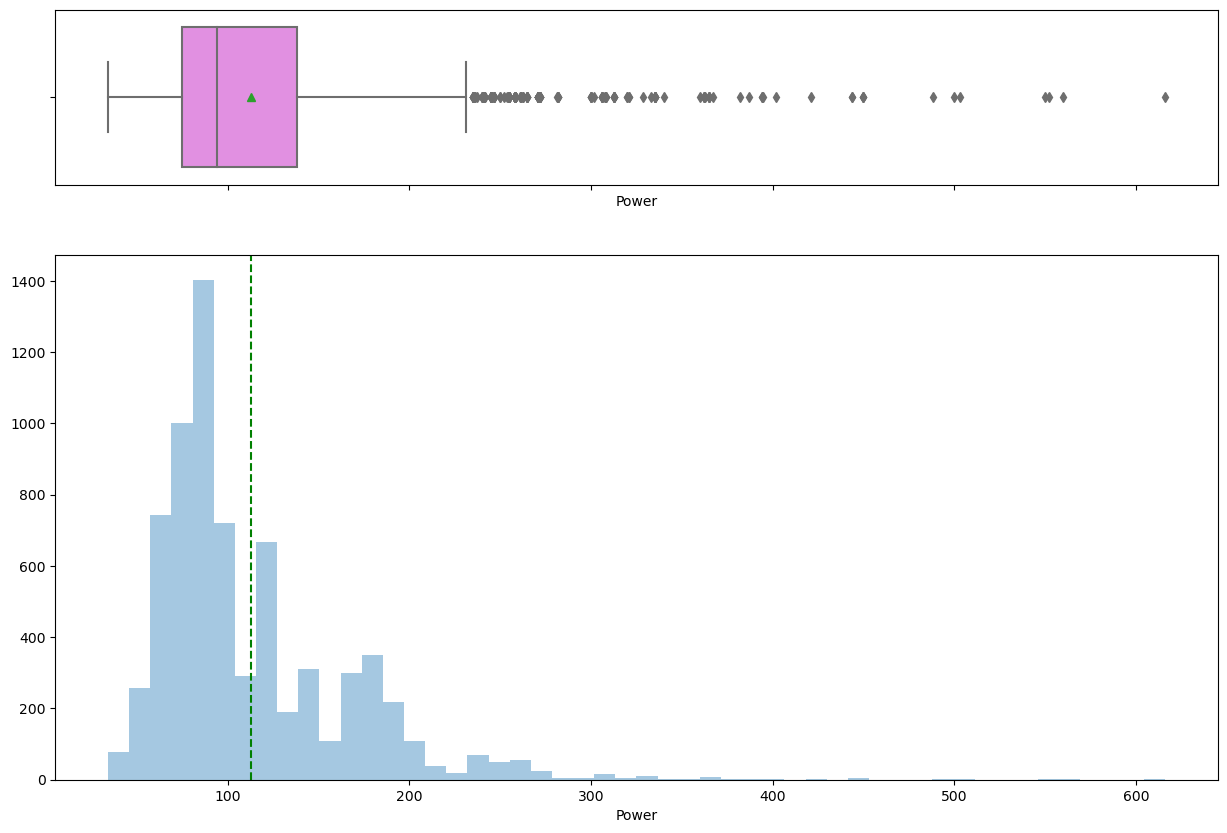

In [25]:
histogram_boxplot(data['Power'])

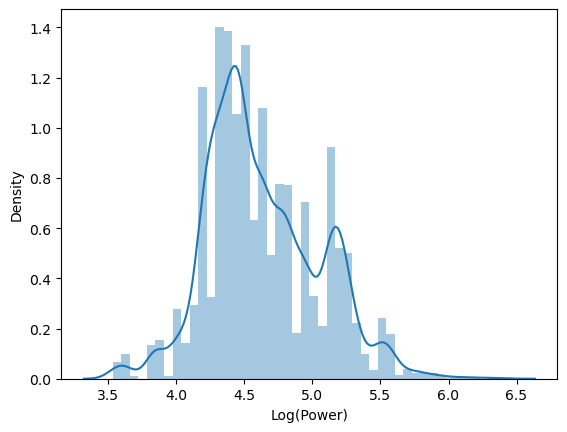

In [26]:
sns.distplot(np.log(data["Power"]), axlabel = "Log(Power)");

**Observations and Insights for all the plots: _____**
- Almost all feature are skewed but only the Price and the Kilometers_driven came close to normal distribution after transforming to log.


## **2. Univariate analysis - Categorical Data**

In [27]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

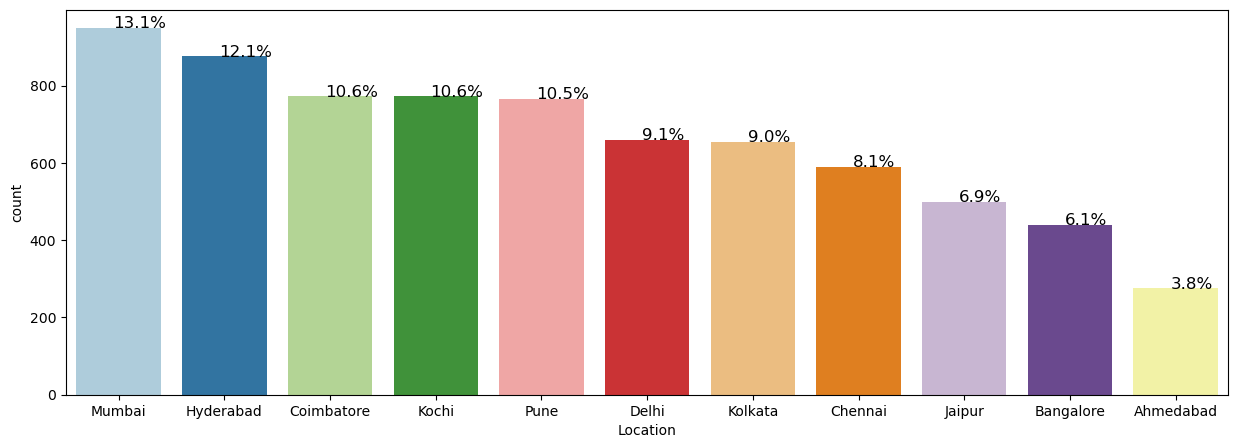

In [28]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

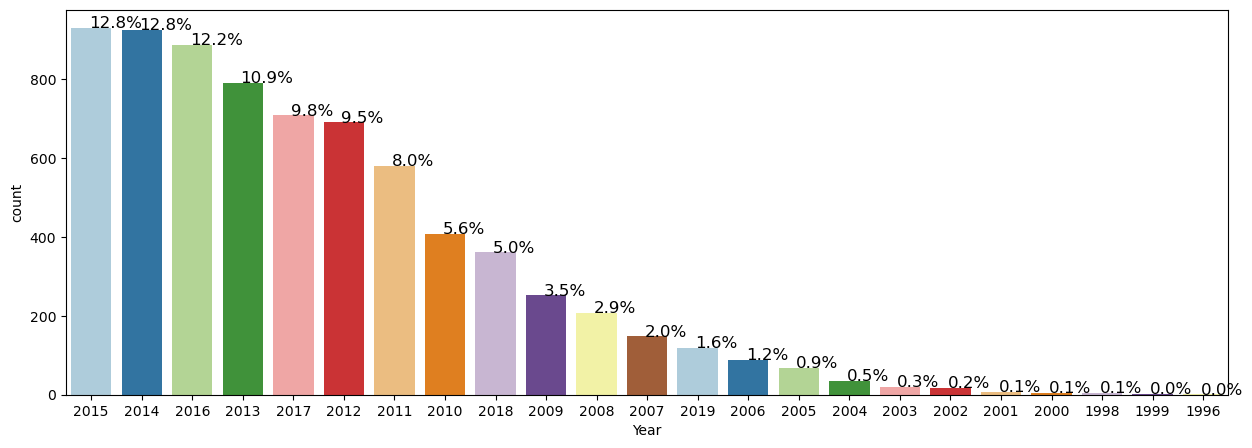

In [29]:
perc_on_bar('Year')

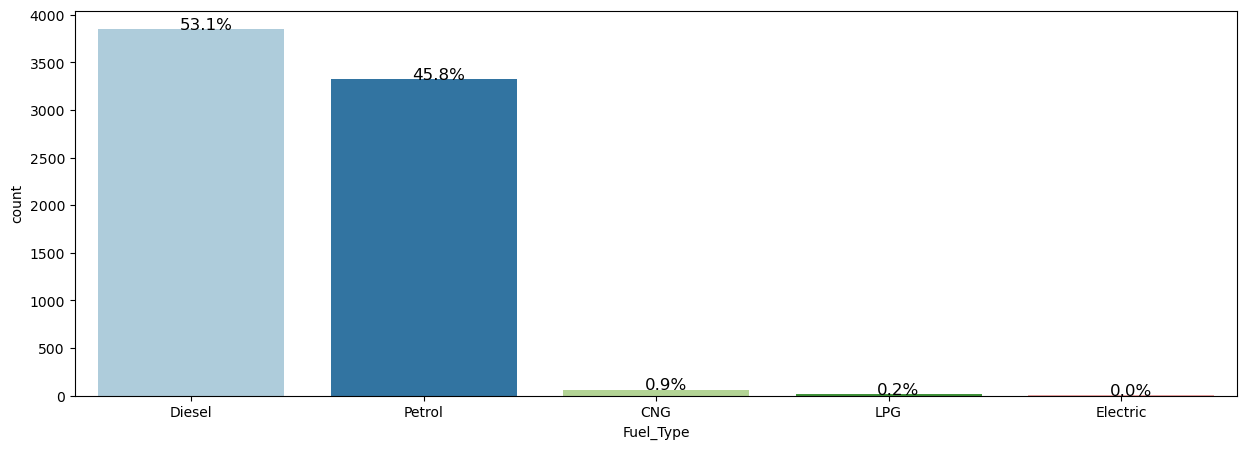

In [30]:
perc_on_bar('Fuel_Type')

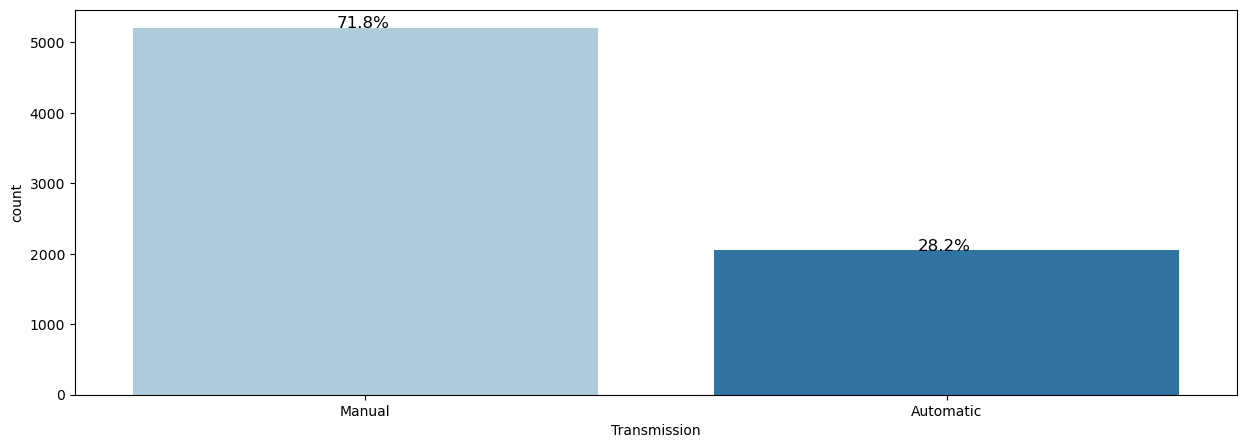

In [31]:
perc_on_bar('Transmission')

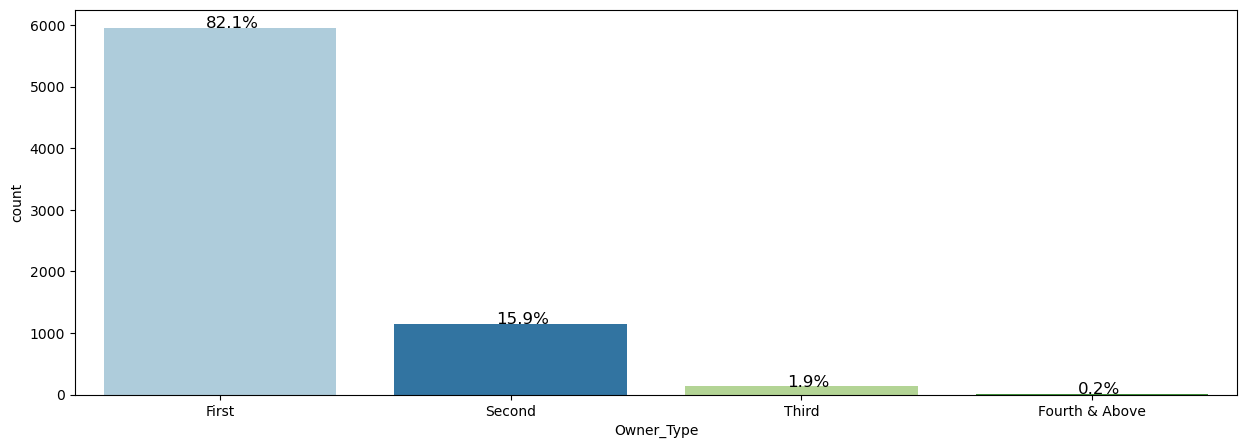

In [32]:
perc_on_bar('Owner_Type')

**Observations and Insights from all plots: _____**
- The highest number of used cars are sold in Mumbai. Although, there is not much difference in other location.
- Most used cars in the data set are relatively recent. The older the year of the car, the lesser of it in the market.
- Most used cars run in Diesel or Petrol.
- Majority of used cars are owned by first-time owners.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='Price_log'>

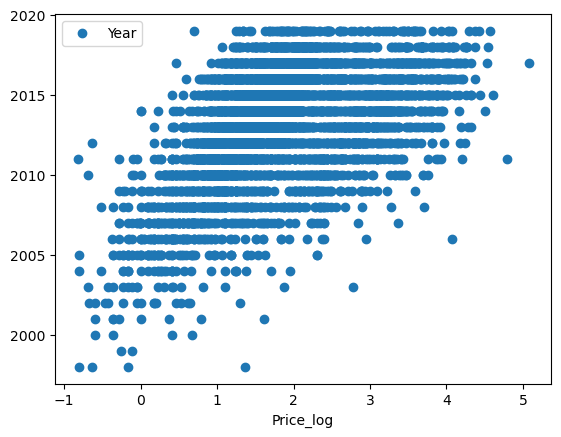

In [33]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Price_log', y = 'Year', style = 'o')

<AxesSubplot:xlabel='kilometers_driven_log'>

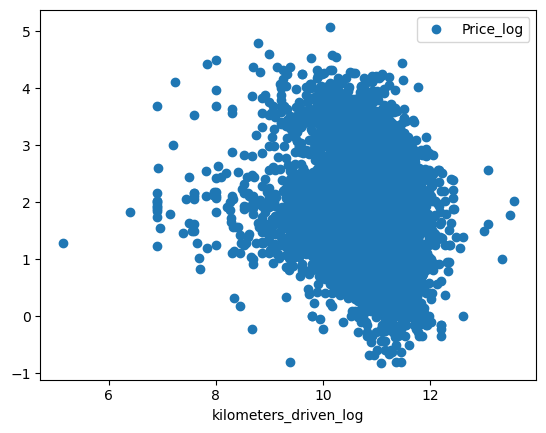

In [34]:
data.plot(x = 'kilometers_driven_log', y = 'Price_log', style = 'o')

<AxesSubplot:xlabel='Price_log'>

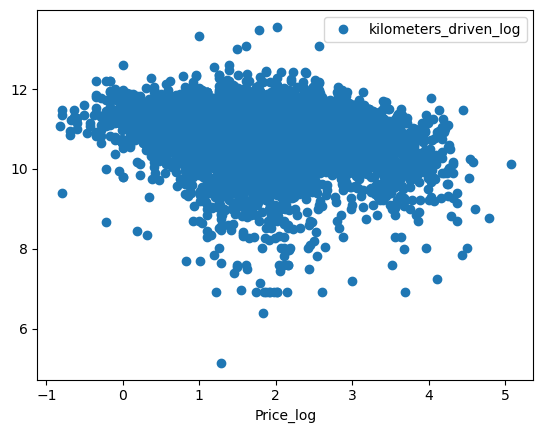

In [35]:
data.plot(x = 'Price_log', y = 'kilometers_driven_log', style = 'o')

<AxesSubplot:xlabel='Engine'>

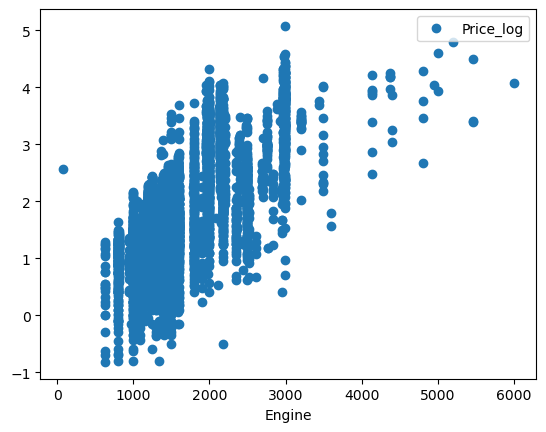

In [36]:
data.plot(x = 'Engine', y = 'Price_log', style = 'o')

<AxesSubplot:xlabel='Power'>

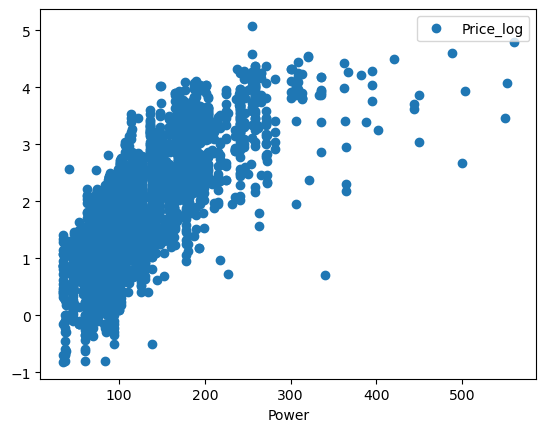

In [37]:
data.plot(x = 'Power', y = 'Price_log', style = 'o')

<AxesSubplot:xlabel='Power'>

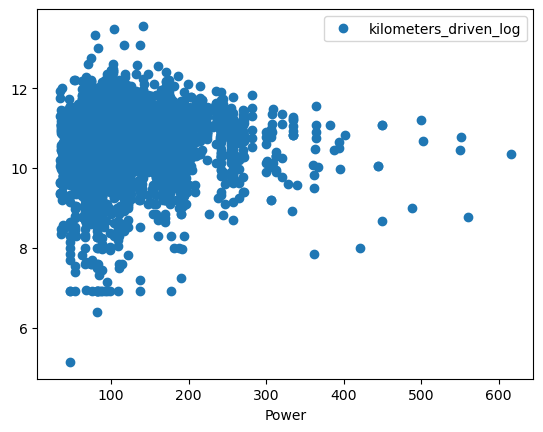

In [38]:
data.plot(x = 'Power', y = 'kilometers_driven_log', style = 'o')

<AxesSubplot:xlabel='Engine'>

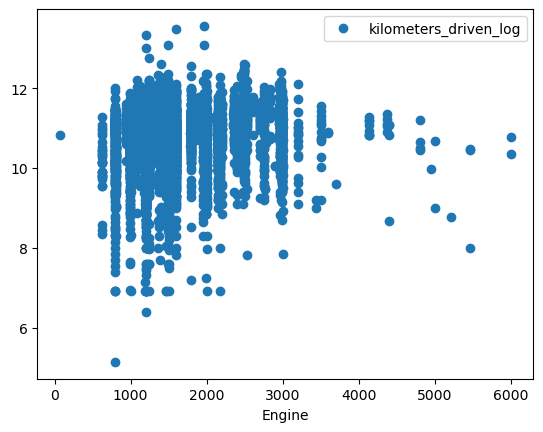

In [39]:
data.plot(x = 'Engine', y = 'kilometers_driven_log', style = 'o')

<AxesSubplot:xlabel='Year'>

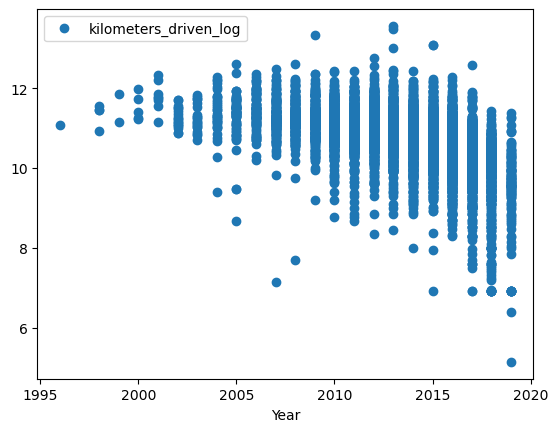

In [40]:
data.plot(x = 'Year', y = 'kilometers_driven_log', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots: _____**
- The more recent the year of the car, the higher its price.
- The higher the mileage of the car, the lesser the price.
- It seems that the lesser car power and engine traveled the most distance.



### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

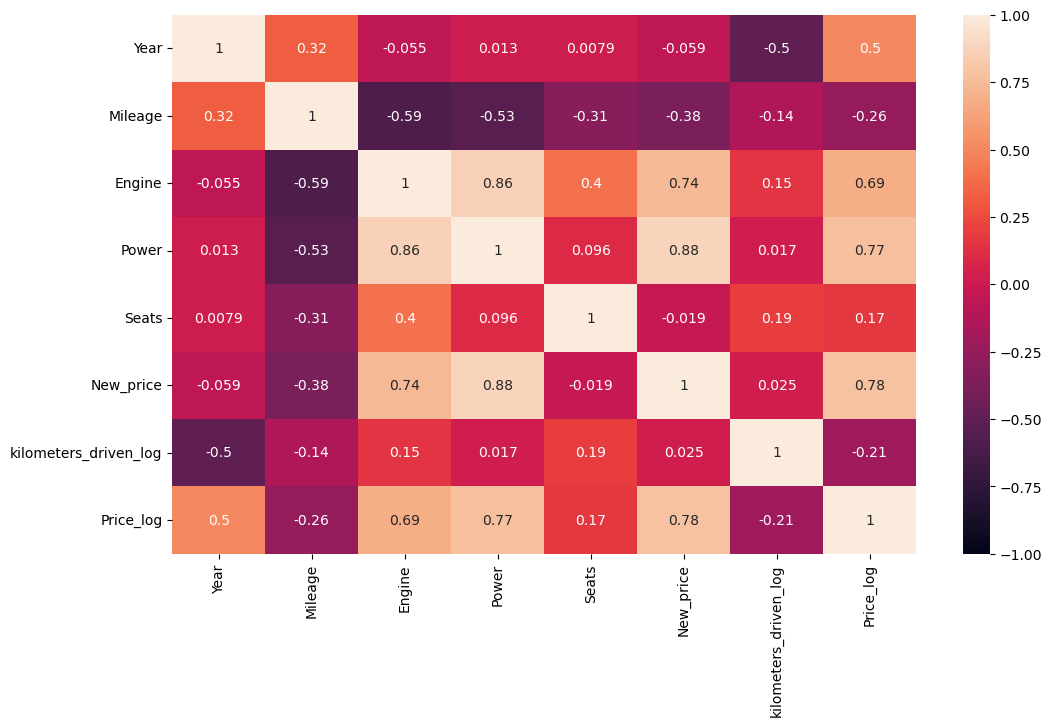

In [41]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights: _____**
- The Power and Engine of the car shows a  positive correlation with the New_price and the price_log
- There is a slight negative correlation between the price_log and the kilometers_driven_log. This is also true for the price_log and Mileage.


### **3. Box plot**

In [42]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

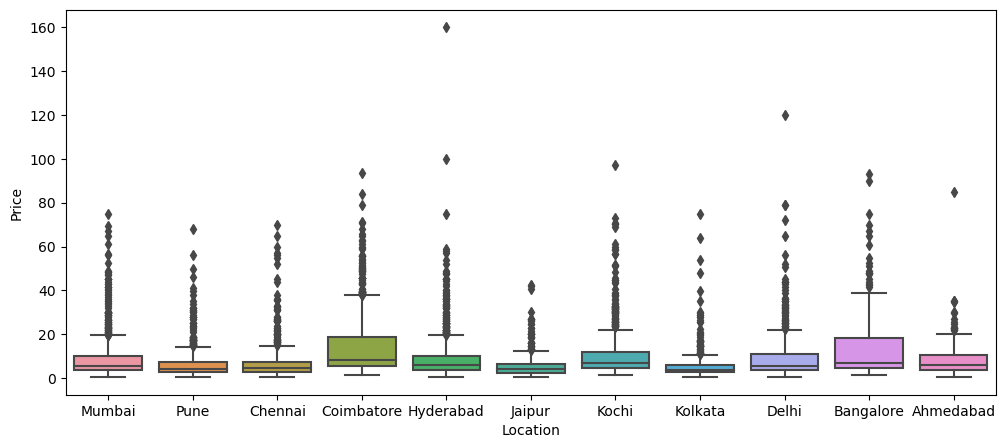

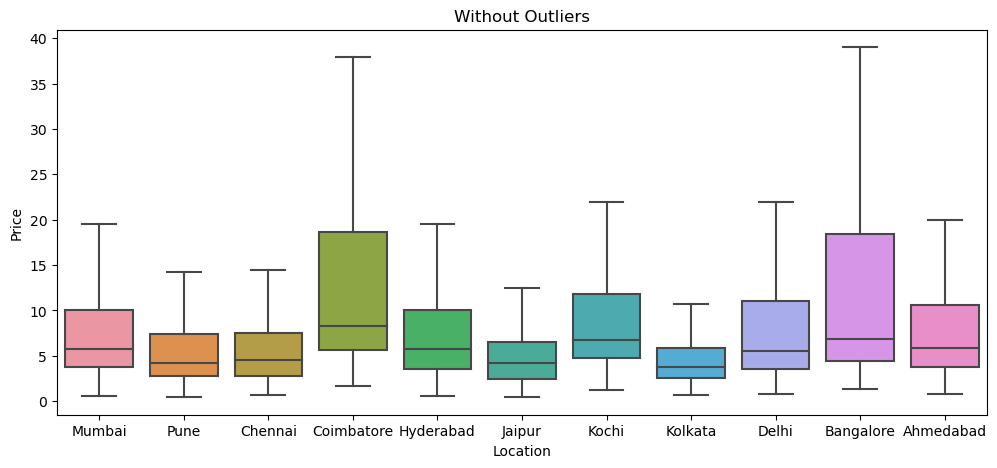

In [43]:
# Box Plot: Price vs Location
boxplot(data['Location'])

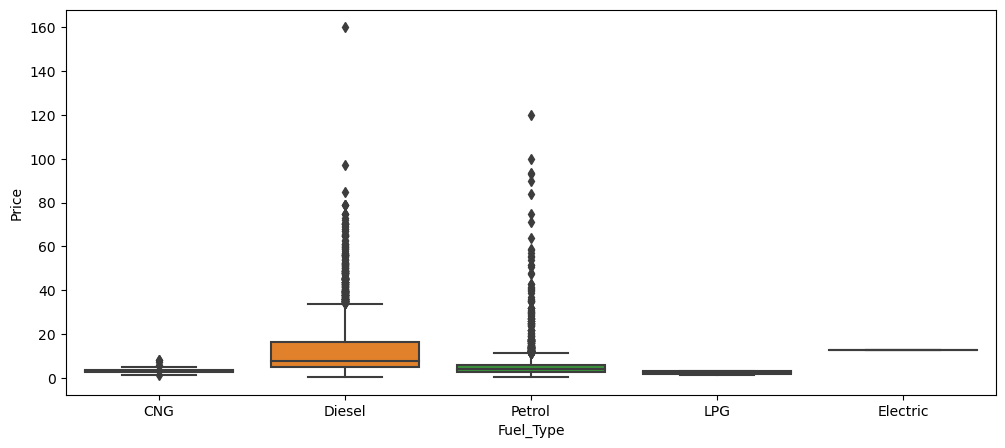

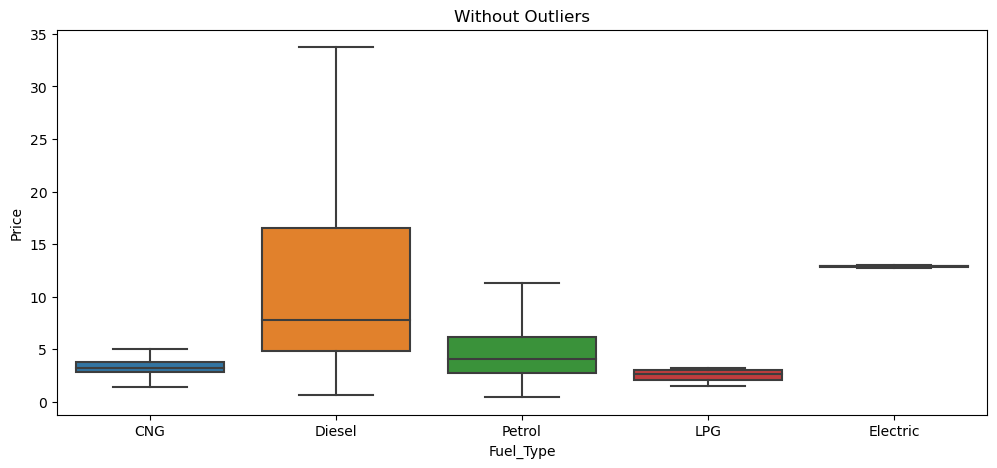

In [44]:
boxplot(data['Fuel_Type'])

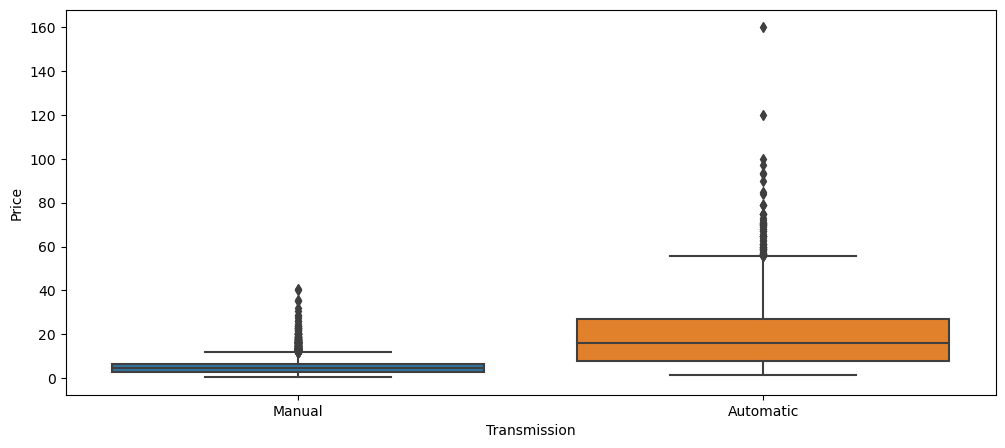

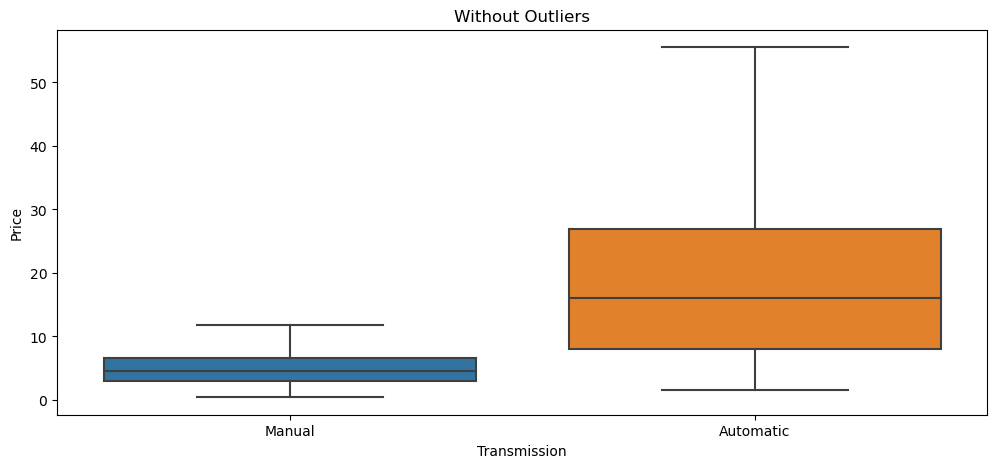

In [45]:
boxplot(data['Transmission'])

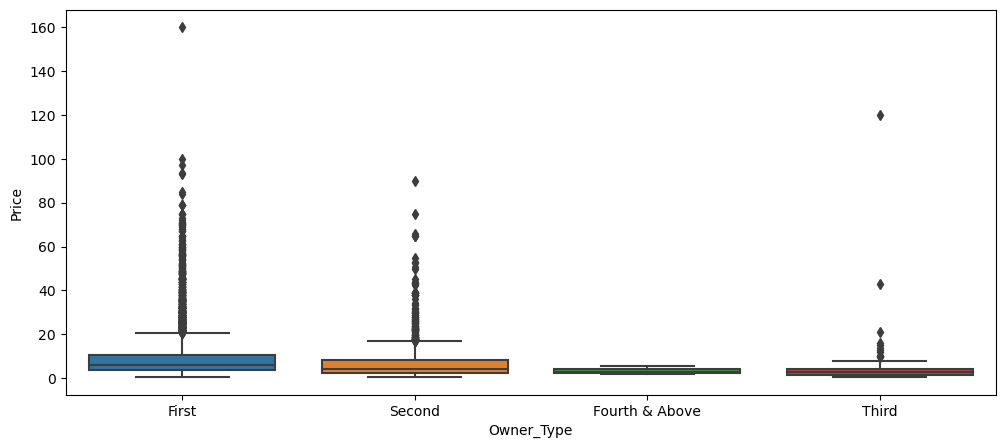

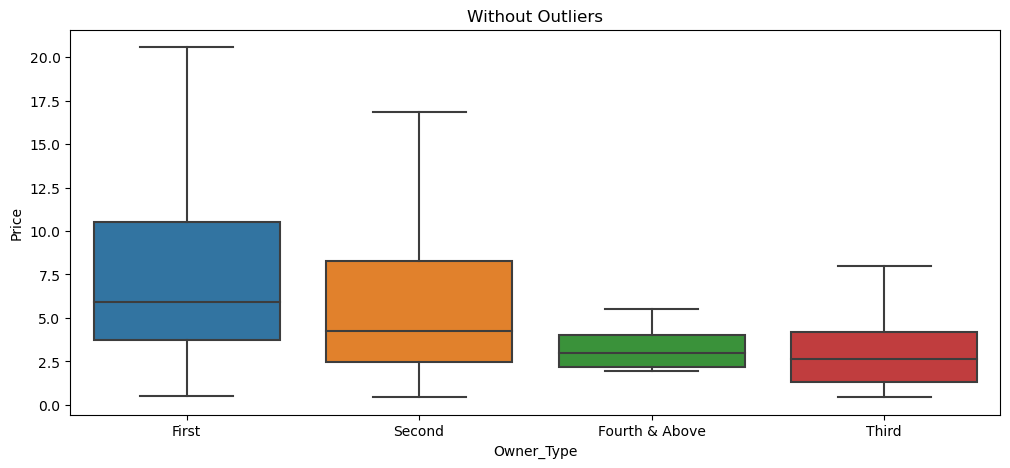

In [46]:
boxplot(data['Owner_Type'])

**Observations and Insights for all plots:__**
- Used cars in Coimbatore and Bangalore are more expensive than other locations.
- Automatic Transmission cars are much more expensive than Manual Transmission.
- First-owned and Second-owned cars are much more expensive.


### **Feature Engineering**

In [47]:
data.nunique()

Name                     2041
Location                   11
Year                       23
Kilometers_Driven        3659
Fuel_Type                   5
Transmission                2
Owner_Type                  4
Mileage                   438
Engine                    150
Power                     383
Seats                       8
New_price                 625
Price                    1373
kilometers_driven_log    3659
Price_log                1373
dtype: int64

In [48]:
data['Make'] = data['Name']
data['Make'] = data.Name.str.split().str.get(0)


In [49]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Make
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,11.225243,0.854415,Hyundai
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50,11.373652,1.252763,Nissan
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50,10.491274,2.862201,Toyota
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.20,11.073335,1.648659,Volkswagen
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95,11.096379,0.667829,Tata


### **Missing value treatment**

In [50]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Make                        0
dtype: int64

**Missing values in Seats**

In [51]:
# Checking missing values in the column 'Seats'
data.Seats.isnull().sum()

53

In [52]:
# Impute missing values in Seats,you can use fillna method in pandas
med_Seats= data.Seats.median()
data['Seats'].fillna(value=med_Seats, inplace=True)

In [53]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data.Seats.isnull().sum()

0

**Missing values for Mileage**

In [54]:
# Now check missing values of each column. Hint: Use isnull() method\
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Make                        0
dtype: int64

In [55]:
# Impute missing Mileage. For example, use can use median or any other methods.
med_Mileage = data.Mileage.median()
data['Mileage'].fillna(value=med_Mileage, inplace=True)

In [56]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data.Mileage.isnull().sum()

0

**Missing values for Engine**

In [57]:
data.Engine.isnull().sum()

46

In [58]:
med_Engine = data.Engine.median()
data['Engine'].fillna(value=med_Engine, inplace=True)

In [59]:
data.Engine.isnull().sum()

0

**Missing values for Power**

In [60]:
data.Power.isnull().sum()

175

In [61]:
med_Power = data.Power.median()
data['Power'].fillna(value=med_Power, inplace=True)

In [62]:
data.Power.isnull().sum()

0

**Missing values for New_price**

In [63]:
data.New_price.isnull().sum()

6246

In [64]:
med_New_price = data.New_price.median()
data['New_price'].fillna(value=med_New_price, inplace=True)

In [65]:
data.New_price.isnull().sum()

0

In [66]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
Price_log                1234
Make                        0
dtype: int64

**Observations for missing values after imputing:**
- All the missing values have been treated by using the median of each of the corresponding feature.
- Only the price has missing values now.

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- There are a lot of regression models that we can create to solve this problem. 
- We can create Linear Regression, Ridge/Lasso Regression, Decision Tree, Random Forest.

- **Overall solution design -** What is the potential solution design?
- We can build a regression model using the most useful features in the dataset such as price, engine, power, and mileage.
- **Measures of success -** What are the key measures of success?
- We can measure success by finding out the accuracy and consistency of the regression model. It should be able to predict the correct price with at least 60-80% accuracy.
- Our model should also identify the most important features in pricing a used car.

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Load the data**

In [77]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import recall_score

from sklearn.model_selection import GridSearchCV

In [78]:


cars_data = pd.read_csv("cars_data_updated.csv")

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [79]:
cars_data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Make
7247,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,11.57,NaN,11.400999,NaN,Volkswagen
7248,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,11.57,NaN,10.985293,NaN,Volkswagen
7249,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,11.57,NaN,10.239960,NaN,Nissan
7250,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,11.57,NaN,10.864025,NaN,Volkswagen
7251,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,11.57,NaN,11.190555,NaN,Mercedes-Benz


In [80]:
cars_data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
Price_log                1234
Make                        0
dtype: int64

In [81]:
cars_data[cars_data.isnull().any(axis=1)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Make
6018,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,11.57,NaN,10.619594,NaN,Maruti
6019,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,11.57,NaN,10.905828,NaN,Maruti
6020,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27,NaN,10.434116,NaN,Toyota
6021,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,94.00,5.0,11.57,NaN,11.842229,NaN,Toyota
6022,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,11.57,NaN,10.275051,NaN,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,11.57,NaN,11.400999,NaN,Volkswagen
7248,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,11.57,NaN,10.985293,NaN,Volkswagen
7249,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,11.57,NaN,10.239960,NaN,Nissan
7250,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,11.57,NaN,10.864025,NaN,Volkswagen


In [82]:
#dropping the rows with missing price/price logs because it won't let me fit the data for regression if there are missing values
cars_data = cars_data.dropna()

In [115]:
# Step-1
X = cars_data.drop(['Name','Price','Price_log','Kilometers_Driven'], axis =1)

y = cars_data[["Price_log", "Price"]]

In [116]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [151]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test= train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4212, 55) (1806, 55)


In [86]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [87]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [88]:
# Create a linear regression model
lr = LinearRegression()

In [89]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

LinearRegression()

In [90]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8614269319532664
R-square on test set :  0.8606830476492656
RMSE on training set :  4.159016893593254
RMSE on test set :  4.1598859124848335


**Observations from results:**
- The results suggest that the model is performing well and is not overfitting the training data, as the R-squared values are high for both the training and test sets. 
- Additionally, the RMSE (root mean squared error) values for both the training and test sets are similar, which further supports the notion that the model is not overfitting the training data.

**Important variables of Linear Regression**

Building a model using statsmodels.

In [91]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     890.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:11:02   Log-Likelihood:                -28.676
No. Observations:                4212   AIC:                             169.4
Df Residuals:                    4156   BIC:                             524.7
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [92]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [93]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Location_Delhi,-0.050213,2.847320e-02
Make_Datsun,-0.663591,1.110680e-02
Location_Jaipur,-0.066899,5.635340e-03
Make_Tata,-0.698581,4.933029e-03
Make_Land,0.724847,3.926223e-03
Make_Mini,0.897572,4.380358e-04
Fuel_Type_Electric,1.065162,2.027202e-05
Owner_Type_Third,-0.129001,6.965369e-06
Location_Coimbatore,0.105161,3.162186e-06
Location_Hyderabad,0.107989,9.051133e-07


In [94]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in mp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Location', 'Make', 'Fuel_Type', 'Owner_Type', 'Seats', 'Mileage', 'kilometers_driven_log', 'Engine', 'Transmission', 'Power', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [95]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge, Lasso

In [96]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)

In [97]:
# Fit Ridge regression model
ridge_model.fit(X_train,y_train['Price_log'])

Ridge()

In [98]:
# Get score of the model
ridge_score = get_model_score(ridge_model)

R-sqaure on training set :  0.8578441760589639
R-square on test set :  0.8594567720911535
RMSE on training set :  4.212438725488039
RMSE on test set :  4.178153575815792


**Observations from results:**
- This model performed slightly worst than the linear regression model.
- The RMSE are also similar so there is no overfitting.

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [113]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [100]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state=1)

In [101]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(random_state=1)

In [102]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999965696959587
R-square on test set :  0.8027754316121417
RMSE on training set :  0.020692719736775493
RMSE on test set :  4.949484225328018


**Observations from results:**
- The given results suggest that the model is overfitting the training data, as evidenced by the high R-squared value on the training set (close to 1) and the much lower R-squared value on the test set.
- The RMSE values indicate that the model has a low training error (0.02) but a higher test error (4.95), which further suggests overfitting. The training error is almost negligible, which could be an indication of memorizing the training data instead of learning its underlying patterns.

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [103]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power                      6.096843e-01
Year                       2.311769e-01
Engine                     4.868539e-02
Mileage                    1.926257e-02
kilometers_driven_log      1.647680e-02
Make_Tata                  5.937944e-03
New_price                  5.308525e-03
Location_Kolkata           4.488718e-03
Make_Honda                 4.465693e-03
Transmission_Manual        4.438136e-03
Make_Audi                  3.370360e-03
Make_Mini                  3.175331e-03
Make_Mahindra              3.069678e-03
Fuel_Type_Diesel           2.959005e-03
Make_BMW                   2.941987e-03
Location_Hyderabad         2.870838e-03
Make_Skoda                 2.706155e-03
Make_Land                  2.637348e-03
Make_Hyundai               2.100951e-03
Location_Coimbatore        1.996633e-03
Owner_Type_Second          1.973054e-03
Make_Toyota                1.760623e-03
Location_Delhi             1.737112e-03
Location_Mumbai            1.650986e-03


**Observations and insights: **
- The feature importance results suggest that "Power" and "Year" are the most important features for predicting car prices using a decision tree model. "Engine", "Mileage", "kilometers_driven_log", "New_price", "Seats", and "Fuel_Type" also have some importance, but to a lesser extent.
- Additionally, the model seems to consider the car's location, make, transmission type, and owner type as relevant factors to some degree.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [104]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [105]:
# Create a Randomforest regression model 
rf_model = RandomForestRegressor(n_estimators = 100)

In [106]:
# Fit Randomforest regression model
rf_model.fit(X_train, y_train['Price_log'])

RandomForestRegressor()

In [107]:
# Get score of the model
Rf_Score = get_model_score(rf_model)

R-sqaure on training set :  0.9772583766373883
R-square on test set :  0.8519085296440768
RMSE on training set :  1.6848529378351578
RMSE on test set :  4.288885576738813


**Observations and insights:**
- The model seems to perform well on both the training and test sets, with an R-squared value of 0.977 and 0.858 respectively. 
- The RMSE on both the training and test sets is relatively low, which indicates that the model is able to accurately predict the target variable. However, the RMSE on the test set is slightly higher than the training set, which may suggest some degree of overfitting.


**Feature Importance**

In [108]:
# Print important features similar to decision trees
print(pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power                      6.136136e-01
Year                       2.316586e-01
Engine                     3.883874e-02
kilometers_driven_log      1.857012e-02
Mileage                    1.642418e-02
New_price                  6.452142e-03
Make_Land                  5.247790e-03
Transmission_Manual        5.175989e-03
Make_Tata                  5.167937e-03
Location_Kolkata           5.010257e-03
Make_Honda                 3.619506e-03
Seats                      3.594189e-03
Make_Mahindra              3.579195e-03
Location_Hyderabad         3.049418e-03
Make_Mercedes-Benz         2.647396e-03
Make_BMW                   2.542546e-03
Location_Coimbatore        2.419110e-03
Make_Mini                  2.389395e-03
Make_Skoda                 2.299867e-03
Make_Audi                  2.220274e-03
Fuel_Type_Petrol           1.953004e-03
Fuel_Type_Diesel           1.877570e-03
Owner_Type_Second          1.773804e-03
Make_Toyota                1.655611e-03


**Observations and insights:**
- Similar to the decision tree model, this model shows that "Power", "Year", and "engine" is the driving force for the price of used car. While, the make_isuzu and make_bentley are the lowest.

### **Hyperparameter Tuning: Decision Tree**

In [134]:
# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': np.arange(2,7),
              'min_samples_split': [ 2,4,6,8],
              'min_samples_leaf': [5, 10, 20, 25],
              'max_features': ['auto','sqrt','log2']
             }
              

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(mean_squared_error, greater_is_better = False)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv= 10)
grid_obj = grid_obj.fit(X_train , y_train['Price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=5,
                      random_state=1)

In [137]:
# Get score of the dtree_tuned
y_pred = dtree_tuned.predict(X_train)
get_model_score(dtree_tuned)

R-sqaure on training set :  0.8476454042462513
R-square on test set :  0.7860296552662656
RMSE on training set :  4.360929319136298
RMSE on test set :  5.155327152902248


[0.8476454042462513, 0.7860296552662656, 4.360929319136298, 5.155327152902248]

**Observations and insights:**
- It looks like the model is performing fairly well with an r-squared of 0.847 on the training set and 0.786 on the test set. 
- The RMSE also improved from the previous model. Although, there is still overfitting to some extent but not as bad as the first decision tree model. 
- Overall, the model may be useful for making predictions, but it could potentially benefit from further tuning or exploration of alternative models.

**Feature Importance**

In [138]:
# Print important features similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.674535
Year                       0.245569
Engine                     0.043605
Mileage                    0.010304
Make_Honda                 0.004472
Transmission_Manual        0.004354
Make_Tata                  0.004125
Make_Audi                  0.002543
kilometers_driven_log      0.002506
Fuel_Type_Diesel           0.002472
Make_Mahindra              0.002344
New_price                  0.001415
Location_Kolkata           0.000749
Make_Porsche               0.000650
Location_Hyderabad         0.000314
Location_Delhi             0.000043
Make_Isuzu                 0.000000
Make_Jaguar                0.000000
Make_Jeep                  0.000000
Make_ISUZU                 0.000000
Make_Lamborghini           0.000000
Make_Land                  0.000000
Make_Nissan                0.000000
Make_Maruti                0.000000
Make_Mercedes-Benz         0.000000
Make_Mini                  0.000000
Make_Mitsubishi            0

**Observations and insights:**
- Power, Year and Engine still remains the high contributor of the price of used cars. 
- In this model, you will see that a lot of features now have zero importance which means that it successfully weeded out the features that is not relevant to the price of the used cars.

### **Hyperparameter Tuning: Random Forest**

In [156]:
#Choose the type of classifier

rf_model_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from

params_rf = {  "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1)}

# Type of scoring used to compare parameter combinations - recall score for class 1

scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

# Run the grid search
grid_obj = GridSearchCV(rf_model_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train['Price_log'])


In [157]:
# Set the classifier to the best combination of parameters
rf_model_tuned = grid_obj.best_estimator_
rf_model_tuned.fit(X_train, y_train['Price_log'])

RandomForestRegressor(n_estimators=500, random_state=1)

In [159]:
# Get score of the model

y_pred = rf_model_tuned.predict(X_train)
get_model_score(rf_model_tuned)

R-sqaure on training set :  0.9760124442063499
R-square on test set :  0.8472294613364547
RMSE on training set :  1.7303910778254235
RMSE on test set :  4.356114054968236


[0.9760124442063499, 0.8472294613364547, 1.7303910778254235, 4.356114054968236]

**Observations and insights: **
- After tuning the hyperparameters of your model, there is a slight decrease in the R-squared values and a slight increase in the RMSE values for both the training and test sets.

- This suggests that the model has become slightly less overfit to the training data, which is a positive outcome. However, the decrease in the R-squared values indicates that the model may not be explaining as much of the variance in the data as before.

- It is also worth noting that the difference in the R-squared and RMSE values between the training and test sets has not changed significantly, which suggests that the model is still performing well and generalizing well to unseen data.

**Feature Importance**

In [160]:
# Print important features similar to decision trees
print(pd.DataFrame(rf_model_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.611569
Year                       0.232685
Engine                     0.039700
kilometers_driven_log      0.018518
Mileage                    0.016673
New_price                  0.006252
Transmission_Manual        0.005562
Make_Land                  0.005466
Make_Tata                  0.005163
Location_Kolkata           0.005142
Seats                      0.003711
Make_Honda                 0.003594
Make_Mahindra              0.003281
Location_Hyderabad         0.002998
Make_Mercedes-Benz         0.002919
Make_BMW                   0.002435
Make_Mini                  0.002399
Location_Coimbatore        0.002310
Make_Audi                  0.002215
Make_Skoda                 0.002144
Fuel_Type_Diesel           0.001830
Make_Toyota                0.001799
Owner_Type_Second          0.001758
Fuel_Type_Petrol           0.001700
Location_Bangalore         0.001578
Make_Volkswagen            0.001526
Location_Delhi             0

**Observations and insights:**
- Power, Year and Engine are still the biggest factor in driving the price of used cars.
- There is not a lot of difference between the original model.

In [165]:
# Defining list of models you have trained
models = [lr, ridge_model, dtree, rf_model, dtree_tuned, rf_model_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [166]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge Model','Decision Tree', 'Random Forest', 'Tuned Decision Tree', 'Tuned Random Forest'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.861427,0.860683,4.159017,4.159886
1,Ridge Model,0.857844,0.859457,4.212439,4.178154
2,Decision Tree,0.999997,0.802775,0.020693,4.949484
3,Random Forest,0.977258,0.851909,1.684853,4.288886
4,Tuned Decision Tree,0.847645,0.786030,4.360929,5.155327
5,Tuned Random Forest,0.976012,0.847229,1.730391,4.356114


**Observations:**
- Looking at the table, we can see that the linear regression and ridge regression models have very similar R-squared values and RMSE values on both the training and test sets, indicating that they perform similarly in this problem. 
- The decision tree model has a much higher R-squared value on the training set, indicating that it may be overfitting to the training data.
- The random forest model has a high R-squared value on both the training and test sets and the lowest RMSE value on the test set, indicating that it is a good choice for this problem. 
- The tuned random forest model also performs well, with a slightly lower R-squared value on the test set but a lower RMSE value, indicating that it may be better at generalizing to new data.

- The tuned decision tree model performs worse than the original decision tree model, with a lower R-squared value and higher RMSE value on the test set. This indicates that the tuning may have led to overfitting or other issues in the model.

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**Refined insights**:
- The most meaningful insights that I got from this is that the Power, Year, and Engine drives the price of used cars. When selling the car, the owner should look at these features to make a reasonable decision for the price.  

**Comparison of various techniques and their relative performance**:
- Upon examining the table, it can be observed that the linear regression and ridge regression models exhibit similar R-squared and RMSE values on both the training and test sets, suggesting that they perform similarly for this particular problem. However, the decision tree model displays a notably higher R-squared value on the training set, implying that it may be overfitting to the training data.

- On the other hand, the random forest model demonstrates a high R-squared value on both the training and test sets, as well as the lowest RMSE value on the test set, making it a promising choice for this problem. The tuned random forest model also performs well, although it has a slightly lower R-squared value on the test set, its lower RMSE value suggests that it may be more effective in generalizing to new data.

- Lastly, the tuned decision tree model performs worse compared to the original decision tree model, with a lower R-squared value and higher RMSE value on the test set. This implies that the tuning process may have caused overfitting or other issues in the model.

**Proposal for the final solution design**:

- Overall, it seems that the random forest model is the best-performing model for this particular problem, with the lowest RMSE value on the test set and high R-squared values on both the training and test sets. However, the choice of the best model ultimately depends on the specific problem and the performance metrics that are most important for the problem.